In [4]:
from mongoengine import connect
from backend.models import create_models
import datetime
import matplotlib.pyplot as plt, seaborn as sns, matplotlib.ticker as ticker # For Plots
import pandas as pd, numpy as np # For analysis
import json

# Model
connect('iat', host='localhost')
models = create_models()

# Date
limit = datetime.datetime(2019, 2, 1)
t_limit = models.Test.objects.filter(created_at__gt=limit) ## greater than limit
now = datetime.datetime.now()

# Plot configuration
sns.set(style="white", color_codes=True)

# Data Exploration

/home/paty/Documents/TUM/Application_Project/iff-iat-master/analysis_env/lib/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


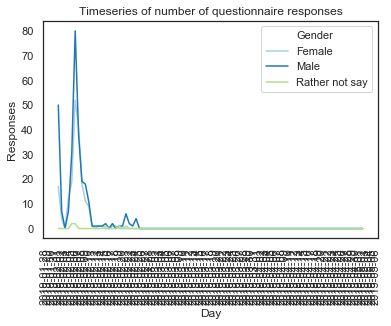

In [5]:
days = []
series = ["Female", "Male", "Rather not say"]

day = limit
while day < now:
    for ser in series:
        count = 0
        for i in t_limit:
            if i.finished:
                if (i["created_at"].date() == day.date()) & (i.questionnaire["start"]["sw_gender"] == ser):
                    count += 1
        days.append([day.date(), ser, count])
    day = day + datetime.timedelta(days=1)

days = pd.DataFrame(days, columns=["Day", "Gender", "Responses"])

ax = sns.lineplot(days['Day'], days['Responses'], hue = days["Gender"], palette = "Paired")
loc, labels = plt.xticks()
ax.set_title("Timeseries of number of questionnaire responses")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
for item in ax.get_xticklabels():
    item.set_rotation(90)

plt.show()

In [6]:
type_gender = ["Female", "Male", "Rather not say"]

finished_tests = [t for t in t_limit if t.finished]

TUM = [t for t in finished_tests if t.questionnaire['end'].get('sw_tum') == 'Yes']
IN_TUM = [t for t in finished_tests if t.questionnaire['end'].get('sw_intum') == 'Yes']
FEM_TUM = [t for t in IN_TUM if t.questionnaire["start"]["sw_gender"] == type_gender[0]]
MALE_TUM = [t for t in IN_TUM if t.questionnaire["start"]["sw_gender"] == type_gender[1]]
RATHER_TUM = [t for t in IN_TUM if t.questionnaire["start"]["sw_gender"] == type_gender[2]]

print(str(len(finished_tests)) + " total answers " + str(len(TUM)) + 
      " were TUM students/employees " + str(len(IN_TUM)) + " were from the Informatics Department" )
print(str(len(FEM_TUM)) + " females, " + str(len(MALE_TUM)) + " males, and " + str(len(RATHER_TUM)) + 
      " rather not say" )

479 total answers 472 were TUM students/employees 457 were from the Informatics Department
184 females, 267 males, and 6 rather not say


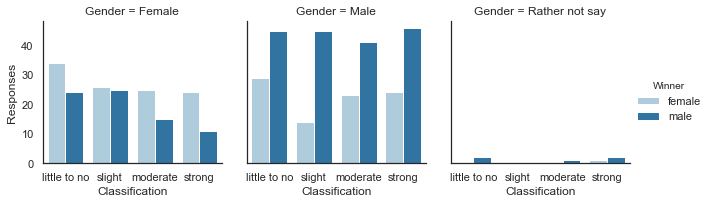

In [7]:
classes = []

type_classifications = ['little to no', 'slight', 'moderate', 'strong']
type_winner = ["female", "male"]
type_gender = ["Female", "Male", "Rather not say"]

for t_class in type_classifications:
    for t_winner in type_winner:
        for t_gender in type_gender:
            count = 0
            for i in IN_TUM:
                if (i["classification"] == t_class) & (i["winner"] == t_winner) & (i.questionnaire["start"]["sw_gender"] == t_gender):
                        count += 1
            classes.append([t_class, t_winner, t_gender, count])

classifications = pd.DataFrame(classes, columns=["Classification","Winner","Gender","Responses"])

# Correct - added in the report
sns.catplot(x="Classification", y="Responses",
    hue="Winner", col="Gender",
    data=classifications, kind="bar", palette='Paired',
    height =3, aspect =1)
plt.show()


## Gender Identity

Positive tone questions: 
1-Female: I feel I fit in with other Females in my department
1-Male: I feel I fit in with other Males in my department
3-Female: I feel comfortable being a Female in my department
3-Male: I feel comfortable being a Male in my department
5-Female: I feel that my personality is similar to most Females personalities in my department
5-Male: I feel that my personality is similar to most Males personalities in my department
6-Female: I feel that the things I like to do in my spare time are similar to what most Females in my department like to do in their spare time
6-Male: I feel that the things I like to do in my spare time are similar to what most Males in my department like to do in their spare time
8-Female: I think I am a good example of being a Female
8-Male: I think I am a good example of being a Male

Negative tone questions: 
2-Female: I feel annoyed that I am supposed to do some things just because I am a Female
2-Male: I feel annoyed that I am supposed 

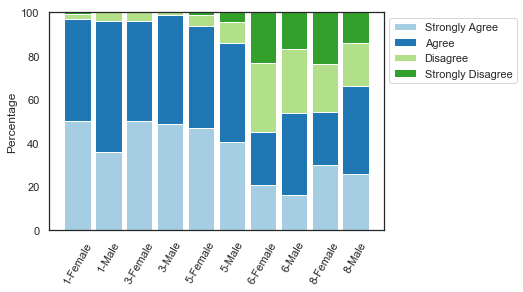

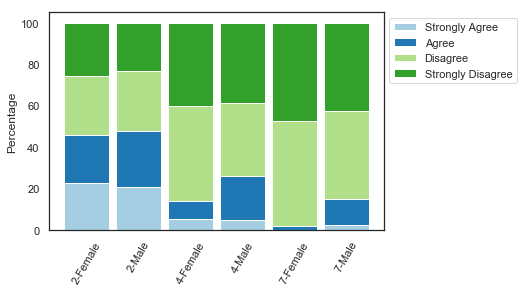

In [8]:
identity = []
identity_perc = []
identity_perc_good = []
identity_perc_bad = []
good = [1, 3, 5, 6, 8]

type_agree = ["Strongly Agree", "Agree", "Disagree", "Strongly Disagree"]
questions = ["I feel I fit in with other thisanswersstartswgendertoLowerCases in my department", 
             "I feel annoyed that I am supposed to do some things just because I am a thisanswersstartswgendertoLowerCase",
            'I feel comfortable being a thisanswersstartswgendertoLowerCase in my department',
            'I feel people interpret my behavior based on my gender',
            'I feel that my personality is similar to most thisanswersstartswgendertoLowerCases personalities in my department',
            'I feel that the things I like to do in my spare time are similar to what most thisanswersstartswgendertoLowerCases in my department like to do in their spare time',
            'I sometimes think it might be more fun to be of opposite gender',
            'I think I am a good example of being a thisanswersstartswgendertoLowerCase']
type_gender = ["Female", "Male", "Rather not say"]
        
# Count of questions
for t_questions in questions:
    count_st_agree = [0,0]
    count_agree = [0,0]
    count_disagree = [0,0]
    count_st_disagree = [0,0]
    for i in IN_TUM:
        if i.questionnaire["start"].get("sw_identity") is not None:
            if i.questionnaire["start"].get("sw_identity").get(t_questions) is not None:
                g = 0
                if i.questionnaire["start"]["sw_gender"] == type_gender[g]:
                    if i.questionnaire["start"].get("sw_identity").get(t_questions) == type_agree[0]:
                        count_st_agree[g] += 1
                    elif i.questionnaire["start"].get("sw_identity").get(t_questions) == type_agree[1]:
                        count_agree[g] += 1
                    elif i.questionnaire["start"].get("sw_identity").get(t_questions) == type_agree[2]:
                        count_disagree[g] += 1
                    else:
                        count_st_disagree[g] += 1
                g = 1
                if i.questionnaire["start"]["sw_gender"] == type_gender[g]:
                    if i.questionnaire["start"].get("sw_identity").get(t_questions) == type_agree[0]:
                        count_st_agree[g] += 1
                    elif i.questionnaire["start"].get("sw_identity").get(t_questions) == type_agree[1]:
                        count_agree[g] += 1
                    elif i.questionnaire["start"].get("sw_identity").get(t_questions) == type_agree[2]:
                        count_disagree[g] += 1
                    else:
                        count_st_disagree[g] += 1
    identity.append([t_questions.replace("thisanswersstartswgendertoLowerCase", "Female"), "Female", count_st_agree[0], count_agree[0], count_disagree[0], count_st_disagree[0]])
    identity.append([t_questions.replace("thisanswersstartswgendertoLowerCase", "Male"), "Male",count_st_agree[1], count_agree[1], count_disagree[1], count_st_disagree[1]])

identity = pd.DataFrame(identity, columns = ["Question", "Gender", "Strongly Agree", "Agree", "Disagree", "Strongly Disagree"])

# Calculate percentage
question_number = 1
round_n = 0
for index, row in identity.iterrows():
    round_n += 1
    total = row["Strongly Agree"] + row["Agree"] + row["Disagree"] + row["Strongly Disagree"]
    if (question_number in good):
        identity_perc_good.append([str(question_number) + '-' + row["Gender"],  
                          row["Question"],
                          row["Gender"],
                        (row["Strongly Agree"]/total)*100, 
                        (row["Agree"]/total)*100, 
                        (row["Disagree"]/total)*100, 
                        (row["Strongly Disagree"]/total)*100])
    else: 
        identity_perc_bad.append([str(question_number) + '-' + row["Gender"],  
                          row["Question"],
                          row["Gender"],
                        (row["Strongly Agree"]/total)*100, 
                        (row["Agree"]/total)*100, 
                        (row["Disagree"]/total)*100, 
                        (row["Strongly Disagree"]/total)*100])
    if round_n%2 == 0:
        round_n=0
        question_number += 1

identity_perc_good = pd.DataFrame(identity_perc_good, columns = ["Short_Question", 
                                                                 "Question", "Gender", 
                                                                 "Strongly Agree", "Agree", 
                                                                 "Disagree", "Strongly Disagree"])
identity_perc_bad = pd.DataFrame(identity_perc_bad, columns = ["Short_Question", 
                                                                 "Question", "Gender", 
                                                                 "Strongly Agree", "Agree", 
                                                                 "Disagree", "Strongly Disagree"])
        
# Print Questions
print("Positive tone questions: ")
question_number = 1
round_n = 0
for index, row in identity.iterrows():
    round_n += 1
    if(question_number in good):
        print(str(question_number) + "-" + row["Gender"] + ": " + row["Question"])
    if round_n%2 == 0:
        round_n=0
        question_number += 1      

print()
print("Negative tone questions: ")
question_number = 1
round_n = 0
for index, row in identity.iterrows():
    round_n += 1
    if(question_number not in good):
        print(str(question_number) + "-" + row["Gender"] + ": " + row["Question"])
    if round_n%2 == 0:
        round_n=0
        question_number += 1   
        

# Stacked Barplot
barWidth = 0.85
## Create Strongly Agreef
plt.bar(identity_perc_good["Short_Question"], identity_perc_good["Strongly Agree"], 
        color=sns.color_palette("Paired")[0], edgecolor='white', width=barWidth, label="Strongly Agree")
## Create Agree
plt.bar(identity_perc_good["Short_Question"], identity_perc_good["Agree"], 
        bottom=identity_perc_good["Strongly Agree"], 
        color=sns.color_palette("Paired")[1], edgecolor='white', width=barWidth, label="Agree")
## Create Disagree
plt.bar(identity_perc_good["Short_Question"], identity_perc_good["Disagree"], 
        bottom=[i+j for i,j in zip(identity_perc_good["Strongly Agree"], identity_perc_good["Agree"])], 
        color=sns.color_palette("Paired")[2], edgecolor='white', width=barWidth, label="Disagree")
## Create Strongly Disagree
plt.bar(identity_perc_good["Short_Question"], identity_perc_good["Strongly Disagree"], 
        bottom=[i+j+k for i,j,k in zip(identity_perc_good["Strongly Agree"], 
                                       identity_perc_good["Agree"], identity_perc_good["Disagree"])], 
        color=sns.color_palette("Paired")[3], edgecolor='white', width=barWidth, label="Strongly Disagree")

## Custom x axis
plt.xticks(rotation = 60)
plt.ylabel("Percentage")

## Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
## Show graphic
plt.show()


# Stacked Barplot
barWidth = 0.85
## Create Strongly Agreef
plt.bar(identity_perc_bad["Short_Question"], identity_perc_bad["Strongly Agree"], 
        color=sns.color_palette("Paired")[0], edgecolor='white', width=barWidth, label="Strongly Agree")
## Create Agree
plt.bar(identity_perc_bad["Short_Question"], identity_perc_bad["Agree"], 
        bottom=identity_perc_bad["Strongly Agree"], 
        color=sns.color_palette("Paired")[1], edgecolor='white', width=barWidth, label="Agree")
## Create Disagree
plt.bar(identity_perc_bad["Short_Question"], identity_perc_bad["Disagree"], 
        bottom=[i+j for i,j in zip(identity_perc_bad["Strongly Agree"], identity_perc_bad["Agree"])], 
        color=sns.color_palette("Paired")[2], edgecolor='white', width=barWidth, label="Disagree")
## Create Strongly Disagree
plt.bar(identity_perc_bad["Short_Question"], identity_perc_bad["Strongly Disagree"], 
        bottom=[i+j+k for i,j,k in zip(identity_perc_bad["Strongly Agree"], 
                                       identity_perc_bad["Agree"], identity_perc_bad["Disagree"])], 
        color=sns.color_palette("Paired")[3], edgecolor='white', width=barWidth, label="Strongly Disagree")

## Custom x axis
plt.xticks(rotation = 60)
plt.ylabel("Percentage")

## Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
## Show graphic
plt.show()

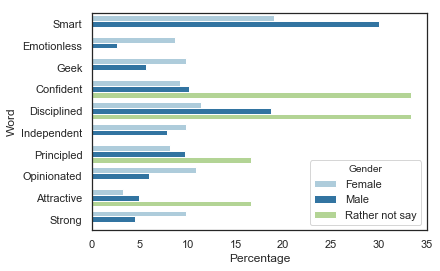

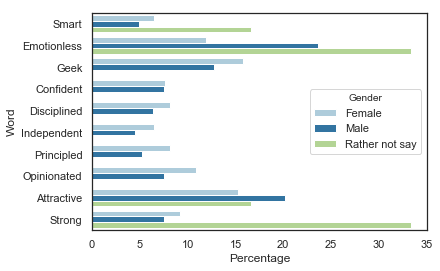

In [6]:
total = 0
first_words = []
last_words = []
top = []
last = []
type_gender = ["Female", "Male", "Rather not say"]
type_word = ['Smart', 'Emotionless', 'Geek', 'Confident', 'Disciplined', 
             'Independent', 'Principled', 'Opinionated', 'Attractive', 'Strong']

for i in IN_TUM:
    first_words.append([i.questionnaire["start"].get("sw_wordidentity")[0], 
                        i.questionnaire["start"]["sw_gender"]])
    last_words.append([i.questionnaire["start"].get("sw_wordidentity")[9], 
                        i.questionnaire["start"]["sw_gender"]])

for i in type_word:
    for g in type_gender:
        count = 0
        total = 0
        for j in first_words:
            if g == j[1]:
                if i == j[0]:
                    count += 1
                total += 1
        top.append([i,g,count/total*100])
        count = 0
        total = 0
        for j in last_words:
            if g == j[1]:
                if i == j[0]:
                    count += 1
                total += 1
        last.append([i,g,count/total*100])

top = pd.DataFrame(top, columns=["Word", "Gender", "Percentage"])
last = pd.DataFrame(last, columns=["Word", "Gender", "Percentage"])

g=sns.barplot(x = top["Percentage"], y = top["Word"], hue = top["Gender"], palette = "Paired")
plt.show()

g=sns.barplot(x = last["Percentage"], y = last["Word"], hue = last["Gender"], palette = "Paired")
plt.show()

## Department related

1-Female: Students in my department are treated equally by the staff regardless of their gender
1-Male: Students in my department are treated equally by the staff regardless of their gender
1-Rather not say: Students in my department are treated equally by the staff regardless of their gender
2-Female: I am confident that the staff of my department would address sexism
2-Male: I am confident that the staff of my department would address sexism
2-Rather not say: I am confident that the staff of my department would address sexism
3-Female: I have witnessed gender discrimination from the staff of my department
3-Male: I have witnessed gender discrimination from the staff of my department
3-Rather not say: I have witnessed gender discrimination from the staff of my department
4-Female: I feel that my supervisoradvisor treats men and women equally at the lab
4-Male: I feel that my supervisoradvisor treats men and women equally at the lab
4-Rather not say: I feel that my supervisoradvisor tr

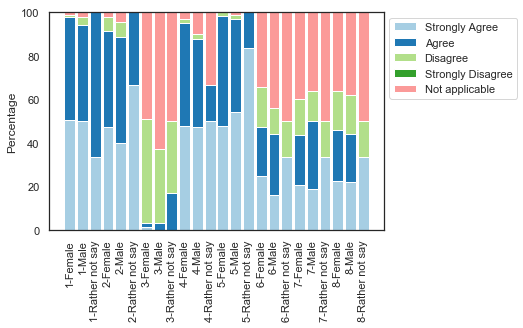

In [9]:
type_agree = ["Strongly Agree", "Agree", "Disagree", "Strongly Disagree", "Not applicable"]
type_gender = ["Female", "Male", "Rather not say"]
questions = ["Students in my department are treated equally by the staff regardless of their gender", 
             "I am confident that the staff of my department would address sexism",
            "I have witnessed gender discrimination from the staff of my department",
            "I feel that my supervisoradvisor treats men and women equally at the lab",
            "I feel that my professor treats men and women equally during the lectures",
            "I feel that my supervisoradvisor aligns herhis research with mine ",
            "I feel that my supervisoradvisor helps me identify my trainingdevelopment needs",
            "I feel that my supervisoradvisor shows interest in my progresssuccess"]
department_related = []
department_related_perc = []

for t_questions in questions:
    for gender in type_gender:
        count_st_agree = [0,0]
        count_agree = [0,0]
        count_disagree = [0,0]
        count_st_disagree = [0,0]
        count_not = [0,0]
        for i in IN_TUM:
            if i.questionnaire["start"]["sw_gender"] == gender:
                if i.questionnaire["end"].get("sw_department") is not None:
                    if i.questionnaire["end"].get("sw_department").get(t_questions) is not None:
                        g = 0
                        if i.questionnaire["end"].get("sw_department").get(t_questions) == type_agree[0]:
                            count_st_agree[g] += 1
                        elif i.questionnaire["end"].get("sw_department").get(t_questions) == type_agree[1]:
                            count_agree[g] += 1
                        elif i.questionnaire["end"].get("sw_department").get(t_questions) == type_agree[2]:
                            count_disagree[g] += 1
                        elif i.questionnaire["end"].get("sw_department").get(t_questions) == type_agree[3]:
                            count_st_disagree[g] += 1
                        else:
                            count_not[g] += 1
        department_related.append([t_questions, gender, count_st_agree[0], count_agree[0], count_disagree[0], 
                               count_st_disagree[0], count_not[0]])
    
department_related = pd.DataFrame(department_related, columns = ["Question", "Gender","Strongly Agree", "Agree", 
                                                                 "Disagree", "Strongly Disagree", 
                                                                 "Not applicable"])
    
    
# Calculate percentage
question_number = 1
round_n = 0
for index, row in department_related.iterrows():
    round_n += 1
    total = row["Strongly Agree"] + row["Agree"] + row["Disagree"] + row["Strongly Disagree"] + row["Not applicable"]
    print(str(question_number) + '-' + row["Gender"] + ': ' + row["Question"])
    department_related_perc.append([str(question_number) + '-' + row["Gender"],  
                      row["Question"],
                      row["Gender"],
                    (row["Strongly Agree"]/total)*100, 
                    (row["Agree"]/total)*100, 
                    (row["Disagree"]/total)*100, 
                    (row["Strongly Disagree"]/total)*100,
                    (row["Not applicable"]/total)*100])
    if round_n%3 == 0:
        round_n=0
        question_number += 1

department_related_perc = pd.DataFrame(department_related_perc, columns = ["Short_Question", 
                                                                 "Question", "Gender", 
                                                                 "Strongly Agree", "Agree", 
                                                                 "Disagree", "Strongly Disagree",
                                                                 "Not applicable"])

# Stacked Barplot
barWidth = 0.85
## Create Strongly Agreef
plt.bar(department_related_perc["Short_Question"], department_related_perc["Strongly Agree"], 
        color=sns.color_palette("Paired")[0], edgecolor='white', width=barWidth, label="Strongly Agree")
## Create Agree
plt.bar(department_related_perc["Short_Question"], department_related_perc["Agree"], 
        bottom=department_related_perc["Strongly Agree"], 
        color=sns.color_palette("Paired")[1], edgecolor='white', width=barWidth, label="Agree")
## Create Disagree
plt.bar(department_related_perc["Short_Question"], department_related_perc["Disagree"], 
        bottom=[i+j for i,j in zip(department_related_perc["Strongly Agree"], department_related_perc["Agree"])], 
        color=sns.color_palette("Paired")[2], edgecolor='white', width=barWidth, label="Disagree")
## Create Strongly Disagree
plt.bar(department_related_perc["Short_Question"], department_related_perc["Strongly Disagree"], 
        bottom=[i+j+k for i,j,k in zip(department_related_perc["Strongly Agree"], 
                                       department_related_perc["Agree"], 
                                       department_related_perc["Disagree"])], 
        color=sns.color_palette("Paired")[3], edgecolor='white', width=barWidth, label="Strongly Disagree")
## Create Not Applicable
plt.bar(department_related_perc["Short_Question"], department_related_perc["Not applicable"], 
        bottom=[i+j+k+q for i,j,k,q in zip(department_related_perc["Strongly Agree"], 
                                       department_related_perc["Agree"], 
                                       department_related_perc["Disagree"],
                                      department_related_perc["Strongly Disagree"])], 
        color=sns.color_palette("Paired")[4], edgecolor='white', width=barWidth, label="Not applicable")

## Custom x axis
plt.xticks(rotation = 90)
plt.ylabel("Percentage")

## Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
## Show graphic
plt.show()



# Data Analysis

## Duration and Mistakes

3.282275711159737% of outliers - removed using z-test
0 tasks with more than 20% of mistakes
0.87527352297593% of negative mistakes


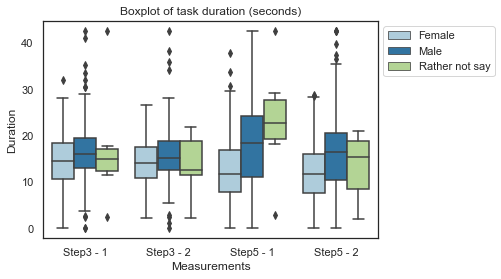

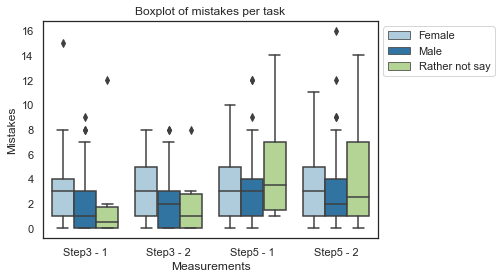

In [10]:
# Find Outliers - box plot
number_words = 20
count = 0
duration = []

for i in IN_TUM:
    duration.append(["Step3 - 1",i["measurements"][2].duration, i["measurements"][2].mistakes,
                     i.questionnaire["start"]["sw_gender"],i["winner"]])
    duration.append(["Step3 - 2",i["measurements"][3].duration, i["measurements"][3].mistakes,
                     i.questionnaire["start"]["sw_gender"],i["winner"]])
    duration.append(["Step5 - 1",i["measurements"][5].duration, i["measurements"][5].mistakes,
                     i.questionnaire["start"]["sw_gender"],i["winner"]])
    duration.append(["Step5 - 2",i["measurements"][6].duration, i["measurements"][6].mistakes,
                     i.questionnaire["start"]["sw_gender"],i["winner"]])

duration = pd.DataFrame(duration, columns = ["Measurements", "Duration", "Mistakes","Gender","Winner"])

# Outlier Duration
outliers = []

def detect_outlier(data_1):
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

outlier_datapoints = detect_outlier(duration["Duration"])

print(str(len(outlier_datapoints)/len(IN_TUM)*100) + "% of outliers - removed using z-test")

# Dealing with outliers
duration.loc[duration.Duration < 0, 'Duration'] = 0 # negative numbers
duration.loc[duration.Duration > int(min(outlier_datapoints)), 
             'Duration'] = min(outlier_datapoints) # positive outliers
tasks = 4
words = 20

duration['Perc_Mistakes'] = (duration["Mistakes"]/(tasks*words))*100
print(str(len(duration[duration.Perc_Mistakes > 20])) + " tasks with more than 20% of mistakes") 

# Negative mistakes - error -> delete
print(str(len(duration[duration.Mistakes < 0])/len(IN_TUM)*100) + "% of negative mistakes")
duration = duration[duration.Mistakes >= 0]

# Box plot
sns.boxplot(y = "Duration", x = "Measurements", hue = "Gender", data = duration, 
            palette = sns.color_palette("Paired")).set_title("Boxplot of task duration (seconds)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
# sns.swarmplot(x="Measurements", y="Duration", data=duration, color=".25")
plt.show()

sns.boxplot(y = "Mistakes", x = "Measurements", hue = "Gender", data = duration, 
            palette = sns.color_palette("Paired")).set_title("Boxplot of mistakes per task")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
# sns.swarmplot(x="Measurements", y="Duration", data=duration, color=".25")
plt.show()

In [11]:
# Percentage of females and males associating Female and Computer Science
winner_female = 0
winner_male = 0
                       
for i in classifications.loc[(classifications.Winner == "female") & (classifications.Gender == "Female"), "Responses"]:
    winner_female += i
for i in classifications.loc[(classifications.Winner == "female") & (classifications.Gender == "Male"), "Responses"]:
    winner_male += i
    
print(winner_female/len(FEM_TUM))
print(winner_male/len(MALE_TUM))

0.592391304347826
0.33707865168539325


## Statistics

In [12]:
# Formula: Results = (Errors + Time of Step 5) - (Errors + Time of Step 3)

results = []

for i in IN_TUM:
    step3_resul = i["measurements"][2].duration + i["measurements"][2].mistakes + i["measurements"][3].duration + i["measurements"][3].mistakes
    step5_resul = i["measurements"][5].duration + i["measurements"][5].mistakes + i["measurements"][6].duration + i["measurements"][6].mistakes
    results.append([(step5_resul - step3_resul), i.questionnaire["start"]["sw_gender"],i["winner"]])

results = pd.DataFrame(results, columns = ["Results", "Gender","Winner"])

print("Mean result of female respondents: " + str(np.mean(results.loc[results.Gender == "Female", "Results"])))
print("Mean result of male respondents: " + str(np.mean(results.loc[results.Gender == "Male", "Results"])))
print("Variance of result of female respondents: " + str(np.var(results.loc[results.Gender == "Female", "Results"])))
print("Variance of result of male respondents: " + str(np.var(results.loc[results.Gender == "Male", "Results"])))
print("Standart deviation of result of female respondents: " + str(np.std(results.loc[results.Gender == "Female", "Results"])))
print("Standart deviation of result of male respondents: " + str(np.std(results.loc[results.Gender == "Male", "Results"])))


Mean result of female respondents: -2.6313143364585443
Mean result of male respondents: 4.51489928856807
Variance of result of female respondents: 167.18030941691708
Variance of result of male respondents: 257.88085312620893
Standart deviation of result of female respondents: 12.929822482034202
Standart deviation of result of male respondents: 16.058669095731716
